#### Step-by-Step

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


df_train['text'] = df_train['text'].apply(preprocess_text)

# Split data into features and labels
X = df_train['text']
y = df_train['label']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

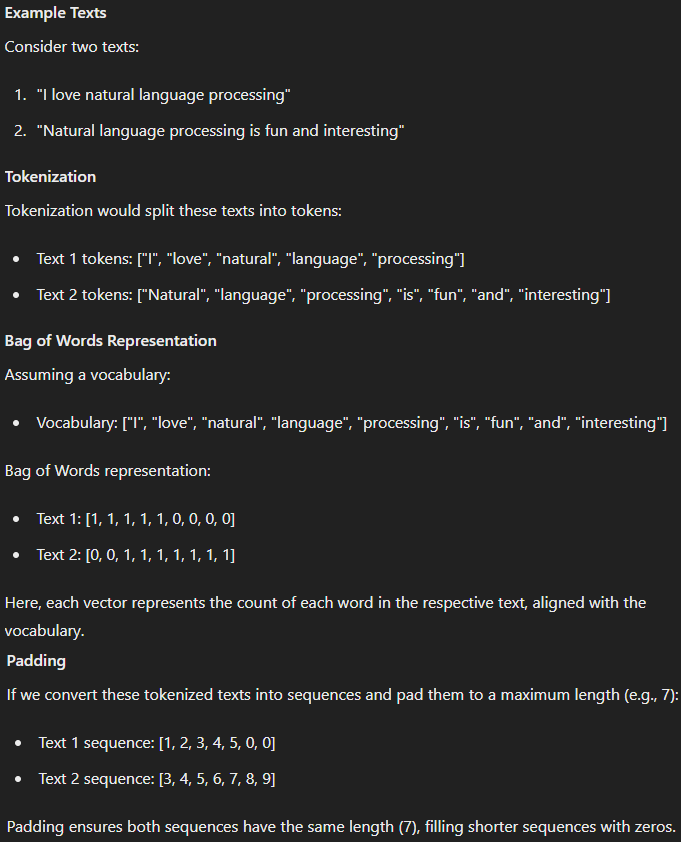

In [ ]:
# Tokenize and pad sequences
max_vocab_size = 20000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_sequence_length, padding='post')

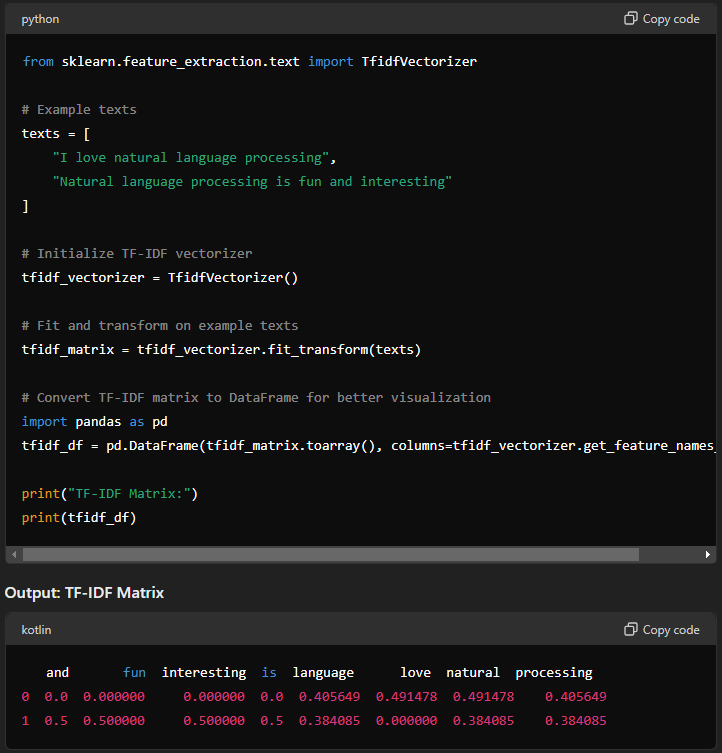

In [ ]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=20000)

# Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform validation data
X_val_tfidf = tfidf_vectorizer.transform(X_val)